In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
def read_images_into_rgb_array(directory, label_val):
    import cv2
    image_files = [file for file in os.listdir(directory) if file.endswith(('.jpg', '.jpeg', '.png', '.gif'))]

    images_array2 = []
    label = []

    for file_name in image_files:
        file_path = os.path.join(directory, file_name)
        try:
            with Image.open(file_path) as img:
                
                # fixing directory path 
                str_file_pth = file_path.split("\\")
                file_path =  str_file_pth[0]+"/"+str_file_pth[1]                            
                #print("file path: {}".format(file_path))
                
                #read image
                image = cv2.imread(file_path)
                #print(image.shape)
                # convert to image to array
                img_array = Image.fromarray(image,'RGB')
                #image sizes are not fix, in order not to have 
                # problem at CNN input, we need to have fix
                # size of image size. Therefore, we resize 
                # the input
                resize_img = img_array.resize((60,60))
                images_array2.append(np.array(resize_img))
                label.append(label_val)
                
        except Exception as e:
            print(f"Error reading {file_path}: {e}")

    return ( images_array2, label )

In [3]:
# read images and their respetive labels into list
[ img_p, label_p ] = read_images_into_rgb_array('cell_images/cell_images/Parasitized',1)
[ img_u, label_u ] = read_images_into_rgb_array('cell_images/cell_images/Uninfected',0)

In [4]:
img_p

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 

In [5]:
#convert list to array for further processing
# infected
X_np = np.array(img_p)
label_np = np.array(label_p)
#uninffected
X_nu = np.array(img_u)
label_nu = np.array(label_u)


In [6]:
#combine infected and uninfecgted data set into single data set
X = np.vstack((X_np, X_nu))
#Y = np.vstack((label_np, label_nu))
Y = np.hstack((label_np, label_nu.T))

In [7]:
X.shape, Y.shape

((27558, 60, 60, 3), (27558,))

In [8]:
# split the data set as train and test
from sklearn.model_selection import train_test_split
x_train, x_test , y_train,y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential()

# Convolutional layers
# input layer size is equal to frame pixel size
model.add(layers.Conv2D(32, (4, 4), activation='relu', input_shape=(60, 60, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output for fully connected layers
model.add(layers.Flatten())

# Fully connected layers
model.add(layers.Dense(264, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) 


In [10]:
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(x_train, y_train, batch_size=10, epochs=10, validation_split=0.1)

Epoch 1/10
1985/1985 [==============================] - 47s 23ms/step - loss: 0.6281 - accuracy: 0.6490 - val_loss: 1.4933 - val_accuracy: 0.4971
Epoch 2/10
1985/1985 [==============================] - 45s 23ms/step - loss: 0.2330 - accuracy: 0.9197 - val_loss: 0.1795 - val_accuracy: 0.9424
Epoch 3/10
1985/1985 [==============================] - 45s 23ms/step - loss: 0.1927 - accuracy: 0.9335 - val_loss: 0.1709 - val_accuracy: 0.9469
Epoch 4/10
1985/1985 [==============================] - 43s 22ms/step - loss: 0.1785 - accuracy: 0.9406 - val_loss: 0.2321 - val_accuracy: 0.9293
Epoch 5/10
1985/1985 [==============================] - 45s 23ms/step - loss: 0.1777 - accuracy: 0.9419 - val_loss: 0.1765 - val_accuracy: 0.9383
Epoch 6/10
1985/1985 [==============================] - 50s 25ms/step - loss: 0.1642 - accuracy: 0.9432 - val_loss: 0.1508 - val_accuracy: 0.9510
Epoch 7/10
1985/1985 [==============================] - 52s 26ms/step - loss: 0.1671 - accuracy: 0.9452 - val_loss: 0.1492 -

In [12]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy}")

173/173 - 2s - loss: 0.1765 - accuracy: 0.9439 - 2s/epoch - 14ms/step
Test Accuracy: 0.9439405202865601


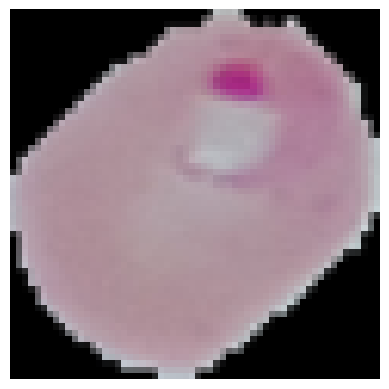

1/1 [==============================] - 0s 129ms/step


array([[1.]], dtype=float32)

In [13]:
#TEST
#infected test
import random
r_index = random.randint(0, len(X_np))
plt.imshow(X_np[r_index])
plt.axis('off')  # Turn off the axis
plt.show()

model.predict(X_np[r_index].reshape(1,60,60,3))
# sigmoid function will result 1 for this value

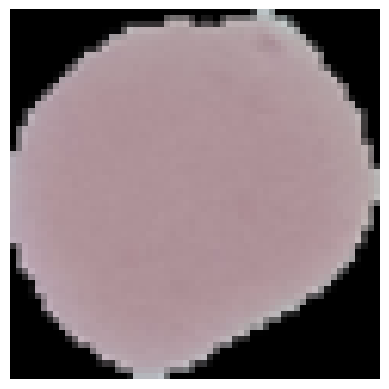

1/1 [==============================] - 0s 27ms/step


array([[0.02137698]], dtype=float32)

In [14]:
r_index = random.randint(0, len(X_nu) );
plt.imshow(X_nu[r_index])
plt.axis('off')  # Turn off the axis
plt.show()

#uninfected test
model.predict(X_nu[r_index].reshape(1,60,60,3))
# sigmout will give 0 for this value

Text(0, 0.5, 'Accuracy/Loss')

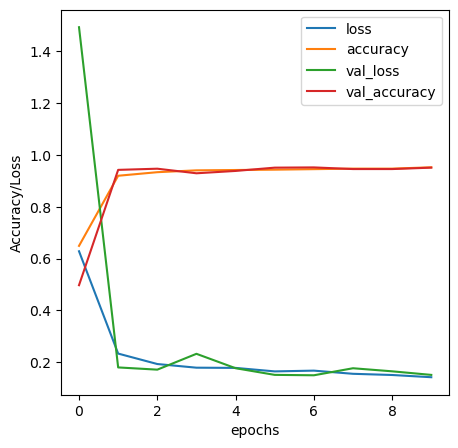

In [15]:
loss_df=pd.DataFrame(history.history)
ax = loss_df.plot(figsize=(5,5))
ax.set_xlabel("epochs")
ax.set_ylabel("Accuracy/Loss")